In [0]:
import pandas as pd
import numpy as np
from numpy.random import seed
import os
import matplotlib.pyplot as plt
from PIL import Image
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model,
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,
from keras.applications.vgg16 import VGG16 

Using TensorFlow backend.


In [0]:
seed(88)
tf.random.set_seed(88)

In [0]:
# empty list to store all image array
images_data = []

# empty list to store all the corresponding labels
images_labels = []

In [0]:
#all the folders or labels
for i in range(4):
    
    # the directory that has all folders with images
    path = f'/content/car/pretrain/{i}/'
    images = os.listdir(path)

    # loop through each image in the folder
    for image in images:
        
        # open each image
        img = Image.open(path + image)

        # resize to 224 x 224
        img = img.resize((224, 224))
        
        # convert image to array
        img_array = np.array(img)
        
        # add each array to the images_data list
        images_data.append(img_array)
        
        # add the label to the images_labels list
        images_labels.append(i)

    #progress report for each folder
    print(f'Completed folder {i}.')

Completed folder 0.
Completed folder 1.
Completed folder 2.
Completed folder 3.


In [0]:
#convert list to arrays

images_array = np.array(images_data)

labels_array = np.array(images_labels)

In [0]:
# images array shape
images_array.shape

(9588, 224, 224, 3)

In [0]:
# label_array shape

labels_array.shape

(9588,)

In [0]:
np.unique(labels_array, return_counts=True)

(array([0, 1, 2, 3]), array([2388, 2400, 2400, 2400]))

In [0]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(images_array,
                                                    labels_array,
                                                    random_state = 888,
                                                    stratify = labels_array)

In [0]:
# add in a validation set. 

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size = 0.2,
                                                 random_state = 888,
                                                 stratify = y_train)

In [0]:
# convert labels to categories
y_train_oh = to_categorical(y_train, 4)
y_val_oh = to_categorical(y_val, 4)

In [0]:
# epochs for CNN model
epochs = 30

In [0]:
model_base = VGG16(weights = 'imagenet',
                   include_top = False, 
                   input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
model_base.trainable = False

for layer in model_base.layers[:-4]:
  layer.trainable = False


In [0]:
for layer in model_base.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7c91bad7b8> False
<keras.layers.convolutional.Conv2D object at 0x7f7c46d90be0> False
<keras.layers.convolutional.Conv2D object at 0x7f7c46d90a20> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7c46d90978> False
<keras.layers.convolutional.Conv2D object at 0x7f7c46e64f28> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464a4be0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7c464b2780> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464b25c0> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464b7320> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464b7eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7c464bc978> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464bc780> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464c24e0> False
<keras.layers.convolutional.Conv2D object at 0x7f7c464c2dd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7c464c7b70>

In [0]:
%%time

model = Sequential()
model.add(model_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4, activation='softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

vgg_fit = model.fit(X_train, y_train_oh,
                    batch_size = 32,
                    epochs = epochs,
                    validation_data=(X_val, y_val_oh))

Train on 5752 samples, validate on 1439 samples
Epoch 1/30
5752/5752 [==============================] - 27s 5ms/step - loss: 3.6540 - accuracy: 0.6610 - val_loss: 0.3582 - val_accuracy: 0.8631
Epoch 2/30
5752/5752 [==============================] - 19s 3ms/step - loss: 0.5664 - accuracy: 0.8088 - val_loss: 0.2235 - val_accuracy: 0.9229
Epoch 3/30
5752/5752 [==============================] - 19s 3ms/step - loss: 0.3997 - accuracy: 0.8597 - val_loss: 0.2817 - val_accuracy: 0.9354
Epoch 4/30
5752/5752 [==============================] - 19s 3ms/step - loss: 0.3767 - accuracy: 0.8830 - val_loss: 0.1513 - val_accuracy: 0.9472
Epoch 5/30
5752/5752 [==============================] - 19s 3ms/step - loss: 0.3120 - accuracy: 0.8986 - val_loss: 0.1101 - val_accuracy: 0.9639
Epoch 6/30
5752/5752 [==============================] - 19s 3ms/step - loss: 0.2764 - accuracy: 0.9013 - val_loss: 0.1011 - val_accuracy: 0.9680
Epoch 7/30
5752/5752 [==============================] - 19s 3ms/step - loss: 0.212

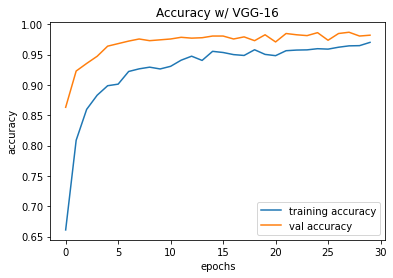

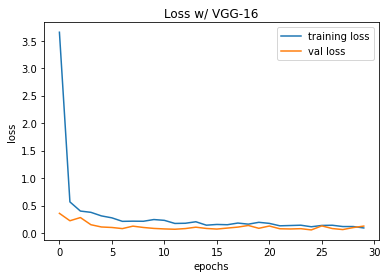

In [0]:
plt.figure(0)
plt.plot(vgg_fit.history['accuracy'], label='training accuracy')
plt.plot(vgg_fit.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy w/ VGG-16')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(vgg_fit.history['loss'], label='training loss')
plt.plot(vgg_fit.history['val_loss'], label='val loss')
plt.title('Loss w/ VGG-16')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
vgg_pred = model.predict_classes(X_test)


In [0]:
vgg_cm = pd.DataFrame(confusion_matrix(y_test, vgg_pred), index = ['Jeep Renegade', 'Jaguar F-Type', 'BMW i8', 'BMW M4'], columns = ['Jeep Renegade', 'Jaguar F-Type', 'BMW i8', 'BMW M4'])
vgg_cm

,Jeep Renegade,Jaguar F-Type,BMW i8,BMW M4
Jeep Renegade,592,0,4,1
Jaguar F-Type,0,593,5,2
BMW i8,0,4,595,1
BMW M4,0,6,20,574


In [0]:
vgg_correct = np.sum(y_test == vgg_pred)
vgg_correct

2354

In [0]:
vgg_correct / len(y_test)

0.982060909470171